<a href="https://colab.research.google.com/github/msinankhan/Transfer_Learning_Using_EfficinetNet/blob/main/Transfer_Learning_EfficeintNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# Getting the helper functions 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2022-09-03 07:04:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-03 07:04:26 (69.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-09-03 06:21:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  39.1MB/s    in 4.1s    

2022-09-03 06:22:03 (39.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [9]:
!unzip 10_food_classes_10_percent.zip

Archive:  10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_wings  
   creating: 10_food_classes_10_per

In [10]:
import os

In [11]:
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f" there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

 there are 2 directories and 0 in 10_food_classes_10_percent
 there are 10 directories and 0 in 10_food_classes_10_percent/test
 there are 0 directories and 250 in 10_food_classes_10_percent/test/fried_rice
 there are 0 directories and 250 in 10_food_classes_10_percent/test/ramen
 there are 0 directories and 250 in 10_food_classes_10_percent/test/steak
 there are 0 directories and 250 in 10_food_classes_10_percent/test/chicken_curry
 there are 0 directories and 250 in 10_food_classes_10_percent/test/ice_cream
 there are 0 directories and 250 in 10_food_classes_10_percent/test/pizza
 there are 0 directories and 250 in 10_food_classes_10_percent/test/chicken_wings
 there are 0 directories and 250 in 10_food_classes_10_percent/test/sushi
 there are 0 directories and 250 in 10_food_classes_10_percent/test/grilled_salmon
 there are 0 directories and 250 in 10_food_classes_10_percent/test/hamburger
 there are 10 directories and 0 in 10_food_classes_10_percent/train
 there are 0 directories a

In [42]:
# Getting our train and test directory 
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

train_data= tf.keras.preprocessing.image_dataset_from_directory(
                                    directory=train_dir,
                                    label_mode='categorical',
                                    image_size=(224,224)
                                    )

test_data=tf.keras.preprocessing.image_dataset_from_directory(
              directory=test_dir,
              label_mode='categorical',
              image_size=(224, 224))





Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [43]:
#Creating a Checkpoint Path
checkpoint_path='food_vision_checkpoint/'

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only=True)

In [44]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [45]:
inputs=tf.keras.layers.Input(shape=(224,224,3)) #3 represents the number of colour channels
x=base_model(inputs)

In [46]:
# passing inputs through GlobalMaxPool2D for maxpooling and reducing the dimensions 
x=tf.keras.layers.GlobalAveragePooling2D()(x)
output=layers.Dense(10,activation='softmax')(x)


In [47]:
model=tf.keras.Model(inputs,output)

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [49]:
initial_epochs = 3
history=model.fit(train_data,
                  epochs=initial_epochs,
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[checkpoint_callback])

Epoch 1/3
24/24 [==============================] - 15s 406ms/step - loss: 1.9337 - accuracy: 0.4173 - val_loss: 1.3749 - val_accuracy: 0.6968
Epoch 2/3
24/24 [==============================] - 9s 370ms/step - loss: 1.1604 - accuracy: 0.7333 - val_loss: 0.9433 - val_accuracy: 0.7856
Epoch 3/3
24/24 [==============================] - 8s 334ms/step - loss: 0.8594 - accuracy: 0.7933 - val_loss: 0.7672 - val_accuracy: 0.8160


### Fine-tuning the last 20 layers of the base model for another 10 epochs





In [50]:
base_model.trainable=True

In [51]:
# making trainable false for everything except the last 20 layers:
for layer in base_model.layers[:-20]:
  layer.trainable=False


In [52]:
for num, layer in enumerate(base_model.layers):
  print(num, layer,layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7f86984ec290> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f869855da90> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f869854b590> False
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7f8698541850> False
4 <keras.layers.convolutional.Conv2D object at 0x7f86984f5f90> False
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f86984ff290> False
6 <keras.layers.core.activation.Activation object at 0x7f86997b5e50> False
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f869850dc90> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8698511990> False
9 <keras.layers.core.activation.Activation object at 0x7f8699524990> False
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f869851ed90> False
11 <keras.layers.core.reshape.Reshape object at 0x7f869847fcd0> False
12 <keras.layers.convo

In [60]:
model2=tf.keras.Model(inputs,output)

In [63]:
model2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])




In [64]:
fine_tune_epochs = initial_epochs + 10


history_fine_tune_model=model2.fit(
                train_data,
                epochs=fine_tune_epochs,
                steps_per_epoch=len(train_data),
                validation_data=test_data,
                validation_steps=len(test_data),
                initial_epoch=history.epoch[-1])


Epoch 3/13
24/24 [==============================] - 16s 392ms/step - loss: 1.2036 - accuracy: 0.6987 - val_loss: 0.6485 - val_accuracy: 0.8256
Epoch 4/13
24/24 [==============================] - 8s 328ms/step - loss: 0.8409 - accuracy: 0.8400 - val_loss: 0.5793 - val_accuracy: 0.8380
Epoch 5/13
24/24 [==============================] - 9s 371ms/step - loss: 0.6563 - accuracy: 0.8653 - val_loss: 0.5379 - val_accuracy: 0.8432
Epoch 6/13
24/24 [==============================] - 8s 329ms/step - loss: 0.5371 - accuracy: 0.8973 - val_loss: 0.5047 - val_accuracy: 0.8504
Epoch 7/13
24/24 [==============================] - 8s 330ms/step - loss: 0.4456 - accuracy: 0.9133 - val_loss: 0.4868 - val_accuracy: 0.8556
Epoch 8/13
24/24 [==============================] - 8s 332ms/step - loss: 0.3738 - accuracy: 0.9187 - val_loss: 0.4723 - val_accuracy: 0.8552
Epoch 9/13
24/24 [==============================] - 8s 328ms/step - loss: 0.3199 - accuracy: 0.9507 - val_loss: 0.4607 - val_accuracy: 0.8600
Epoch

In [65]:
results_last_20_layer_model=model2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.4265 - accuracy: 0.8588


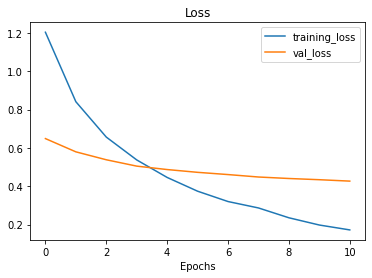

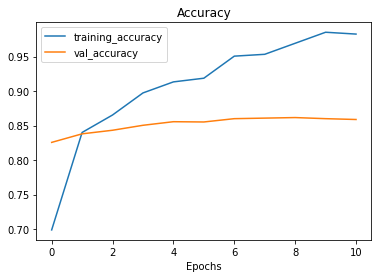

In [68]:
plot_loss_curves(history_fine_tune_model)